Входные данные

Вам дается две выборки с пользовательскими сессиями - id-шниками просмотренных и id-шниками купленных товаров. Одна выборка будет использоваться для обучения (оценки популярностей товаров), а другая - для теста.

В файлах записаны сессии по одной в каждой строке. Формат сессии: id просмотренных товаров через , затем идёт ; после чего следуют id купленных товаров (если такие имеются), разделённые запятой. Например, 1,2,3,4; или 1,2,3,4;5,6.

Гарантируется, что среди id купленных товаров все различные.

Важно:

Сессии, в которых пользователь ничего не купил, исключаем из оценки качества.
Если товар не встречался в обучающей выборке, его популярность равна 0.
Рекомендуем разные товары. И их число должно быть не больше, чем количество различных просмотренных пользователем товаров.
Рекомендаций всегда не больше, чем минимум из двух чисел: количество просмотренных пользователем товаров и k в recall@k / precision@k.
Задание

На обучении постройте частоты появления id в просмотренных и в купленных (id может несколько раз появляться в просмотренных, все появления надо учитывать)
Реализуйте два алгоритма рекомендаций:
сортировка просмотренных id по популярности (частота появления в просмотренных),
сортировка просмотренных id по покупаемости (частота появления в покупках).

3. Для данных алгоритмов выпишите через пробел AverageRecall@1, AveragePrecision@1, AverageRecall@5, AveragePrecision@5 на обучающей и тестовых выборках, округляя до 2 знака после запятой. Это будут ваши ответы в этом задании. Посмотрите, как они соотносятся друг с другом. Где качество получилось выше? Значимо ли это различие? Обратите внимание на различие качества на обучающей и тестовой выборке в случае рекомендаций по частотам покупки.

Если частота одинаковая, то сортировать нужно по возрастанию момента просмотра (чем раньше появился в просмотренных, тем больше приоритет)

Дополнительные вопросы

Обратите внимание, что при сортировке по покупаемости возникает много товаров с одинаковым рангом - это означает, что значение метрик будет зависеть от того, как мы будем сортировать товары с одинаковым рангом. Попробуйте убедиться, что при изменении сортировки таких товаров recall@k меняется. Подумайте, как оценить минимальное и максимальное значение recall@k в зависимости от правила сортировки.
Мы обучаемся и тестируемся на полных сессиях (в которых есть все просмотренные за сессию товары). Подумайте, почему полученная нами оценка качества рекомендаций в этом случае несколько завышена.

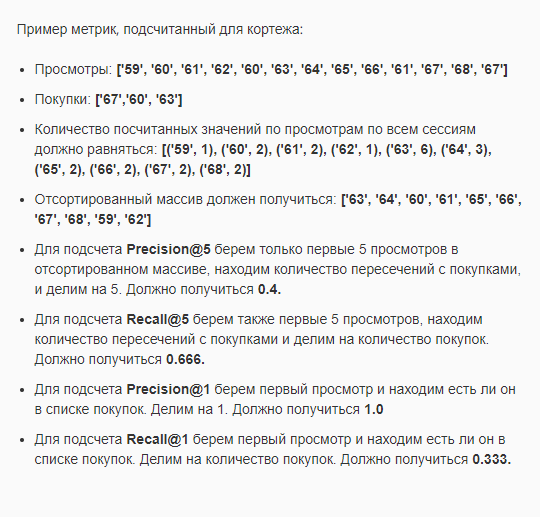

##Task1##

In [196]:
from collections import defaultdict
import numpy as np
import pandas as pd

def get_multiSortedArray(originalArray, temp_dict):
    counts = []
    values = pd.unique(originalArray)
    for value in values:
        counts.append(temp_dict[value])

    tempData = pd.DataFrame(data={ "values" : values, "counts" : counts, "originalOrder" : range(0, len(values)) })
    
    #print tempData.sort_values(['counts', 'originalOrder'], ascending=[False, True])
    
    return tempData.sort_values(['counts', 'originalOrder'], ascending=[False, True])["values"].values
    
def precison(sorted_browsed,bought, number):
    or_list = list(set(sorted_browsed[:number]) & set(bought))
    return len(or_list) / float(number)

def recall(sorted_browsed, bought, number):    
    or_list = list(set(sorted_browsed[:number]) & set(bought))
    return len(or_list) / float(len(bought))

In [197]:
file_obj = open('coursera_sessions_train.txt')

avg_precison5 = []
avg_recall5 = []
avg_precison1 = []
avg_recall1 = []
full_browsed = []
list_without_None = []

for line in file_obj:
    #Разделение на элементы
    browsed = line.strip().split(";")[0].split(",")
    bought = line.strip().split(";")[1].split(",", )
    
    full_browsed = full_browsed + browsed
    #Составление словаря для просмотренных элементов
    if bought[0] != "":    
        list_without_None.append((browsed, bought))


#Составляем словать для всех слов
temp_dict = defaultdict(int)    
for w in full_browsed:
    temp_dict[w] += 1

#print full_browsed
#print bought_list
for current_item in list_without_None:
    #Разделение на элементы
    #Составление словаря для просмотренных элементов
 
    #print current_bought
    sorted_browsed = get_multiSortedArray(current_item[0], temp_dict)

    precison5 = precison(sorted_browsed, current_item[1], 5)
    recall5 = recall(sorted_browsed, current_item[1], 5)
    precison1 = precison(sorted_browsed, current_item[1], 1)
    recall1 = recall(sorted_browsed, current_item[1], 1)
        
    avg_precison5.append(precison5)
    avg_recall5.append(recall5)
    avg_precison1.append(precison1)
    avg_recall1.append(recall1)
         
print np.mean(avg_recall1), np.mean(avg_precison1), np.mean(avg_recall5), np.mean(avg_precison5)
print str(round(np.mean(avg_recall1),2))+", "+ str(round(np.mean(avg_precison1),2))+", "+str(round(np.mean(avg_recall5),2))+", "+ str(round(np.mean(avg_precison5),2)) 

0.442634316595 0.512195121951 0.824691824713 0.212527716186
0.44, 0.51, 0.82, 0.21


In [195]:
print sorted_browsed[:5]
print set(sorted_browsed[:5])

['73' '158' '204' '262' '162']
set(['158', '73', '204', '162', '262'])


In [192]:
def write_answer(fileName, value):
    with open(fileName+".txt", "w") as fout:
        fout.write(str(value))

In [201]:
write_answer("task1", "0.44 0.51 0.82 0.21")

In [176]:
line = "59,60,61,62,60,63,64,65,66,61,67,68,67;67,60,63"
browsed = line.strip().split(";")[0].split(",")
bought = line.strip().split(";")[1].split(",", )

precison5 = precison(browsed, bought, 5)
recall5 = recall(browsed, bought, 5)
precison1 = precison(browsed, bought, 1)
recall1 = recall(browsed, bought, 1)

print recall1, precison1, recall5, precison5

print browsed + bought

   counts  originalOrder values
1       2              1     60
2       2              2     61
8       2              8     67
0       1              0     59
3       1              3     62
4       1              4     63
5       1              5     64
6       1              6     65
7       1              7     66
9       1              9     68
   counts  originalOrder values
1       2              1     60
2       2              2     61
8       2              8     67
0       1              0     59
3       1              3     62
4       1              4     63
5       1              5     64
6       1              6     65
7       1              7     66
9       1              9     68
   counts  originalOrder values
1       2              1     60
2       2              2     61
8       2              8     67
0       1              0     59
3       1              3     62
4       1              4     63
5       1              5     64
6       1              6     65
7       

In [199]:
file_obj = open('coursera_sessions_train.txt')
file_obj_test = open("coursera_sessions_test.txt")

avg_precison5 = []
avg_recall5 = []
avg_precison1 = []
avg_recall1 = []
full_browsed = []
list_without_None = []

#Сoставляем частоты 
for line in file_obj:
    #Разделение на элементы
    browsed = line.strip().split(";")[0].split(",")
    full_browsed = full_browsed + browsed
#Составляем словать для всех слов
temp_dict = defaultdict(int)    
for w in full_browsed:
    temp_dict[w] += 1

for line in file_obj_test:
    #Разделение на элементы
    browsed = line.strip().split(";")[0].split(",")
    bought = line.strip().split(";")[1].split(",", )
    
    #Составление словаря для просмотренных элементов
    if bought[0] != "":    
        list_without_None.append((browsed, bought))


for current_item in list_without_None:
    #Разделение на элементы
    #Составление словаря для просмотренных элементов
 
    #print current_bought
    sorted_browsed = get_multiSortedArray(current_item[0], temp_dict)

    precison5 = precison(sorted_browsed, current_item[1], 5)
    recall5 = recall(sorted_browsed, current_item[1], 5)
    precison1 = precison(sorted_browsed, current_item[1], 1)
    recall1 = recall(sorted_browsed, current_item[1], 1)
        
    avg_precison5.append(precison5)
    avg_recall5.append(recall5)
    avg_precison1.append(precison1)
    avg_recall1.append(recall1)
         
print np.mean(avg_recall1), np.mean(avg_precison1), np.mean(avg_recall5), np.mean(avg_precison5)
print str(round(np.mean(avg_recall1),2))+", "+ str(round(np.mean(avg_precison1),2))+", "+str(round(np.mean(avg_recall5),2))+", "+ str(round(np.mean(avg_precison5),2)) 

0.417332662033 0.481309686221 0.800034066354 0.203765347885
0.42, 0.48, 0.8, 0.2


In [202]:
write_answer("task2", "0.42 0.48 0.8 0.2")

In [204]:
file_obj = open('coursera_sessions_train.txt')

avg_precison5 = []
avg_recall5 = []
avg_precison1 = []
avg_recall1 = []
full_bought = []
list_without_None = []

for line in file_obj:
    #Разделение на элементы
    browsed = line.strip().split(";")[0].split(",")
    bought = line.strip().split(";")[1].split(",", )
    
    #Составление словаря для просмотренных элементов
    if bought[0] != "":    
        full_bought = full_bought + bought
        list_without_None.append((browsed, bought))


#Составляем словать для всех слов
temp_dict = defaultdict(int)    
for w in full_bought:
    temp_dict[w] += 1

#print full_browsed
#print bought_list
for current_item in list_without_None:
    #Разделение на элементы
    #Составление словаря для просмотренных элементов
 
    #print current_bought
    sorted_browsed = get_multiSortedArray(current_item[0], temp_dict)

    precison5 = precison(sorted_browsed, current_item[1], 5)
    recall5 = recall(sorted_browsed, current_item[1], 5)
    precison1 = precison(sorted_browsed, current_item[1], 1)
    recall1 = recall(sorted_browsed, current_item[1], 1)
        
    avg_precison5.append(precison5)
    avg_recall5.append(recall5)
    avg_precison1.append(precison1)
    avg_recall1.append(recall1)
         
print np.mean(avg_recall1), np.mean(avg_precison1), np.mean(avg_recall5), np.mean(avg_precison5)
print str(round(np.mean(avg_recall1),2))+" "+ str(round(np.mean(avg_precison1),2))+" "+str(round(np.mean(avg_recall5),2))+" "+ str(round(np.mean(avg_precison5),2)) 

0.688449492427 0.80376940133 0.926307302423 0.252549889135
0.69 0.8 0.93 0.25


In [205]:
write_answer("task3", "0.69 0.8 0.93 0.25")

In [208]:
file_obj = open('coursera_sessions_train.txt')
file_obj_test = open("coursera_sessions_test.txt")

avg_precison5 = []
avg_recall5 = []
avg_precison1 = []
avg_recall1 = []
full_bought = []
list_without_None = []

#Сoставляем частоты 
for line in file_obj:
    #Разделение на элементы
    browsed = line.strip().split(";")[0].split(",")
    if bought[0] != "":    
        full_bought = full_bought + bought

#Составляем словать для всех слов
temp_dict = defaultdict(int)    
for w in full_bought:
    temp_dict[w] += 1

for line in file_obj_test:
    #Разделение на элементы
    browsed = line.strip().split(";")[0].split(",")
    bought = line.strip().split(";")[1].split(",", )
    
    #Составление словаря для просмотренных элементов
    if bought[0] != "":    
        list_without_None.append((browsed, bought))


for current_item in list_without_None:
    #Разделение на элементы
    #Составление словаря для просмотренных элементов
 
    #print current_bought
    sorted_browsed = get_multiSortedArray(current_item[0], temp_dict)

    precison5 = precison(sorted_browsed, current_item[1], 5)
    recall5 = recall(sorted_browsed, current_item[1], 5)
    precison1 = precison(sorted_browsed, current_item[1], 1)
    recall1 = recall(sorted_browsed, current_item[1], 1)
        
    avg_precison5.append(precison5)
    avg_recall5.append(recall5)
    avg_precison1.append(precison1)
    avg_recall1.append(recall1)
         
print np.mean(avg_recall1), np.mean(avg_precison1), np.mean(avg_recall5), np.mean(avg_precison5)
print str(round(np.mean(avg_recall1),2))+" "+ str(round(np.mean(avg_precison1),2))+" "+str(round(np.mean(avg_recall5),2))+" "+ str(round(np.mean(avg_precison5),2)) 

0.474717093438 0.550613915416 0.81842242852 0.209276944065
0.47 0.55 0.82 0.21


In [207]:
write_answer("task4", "0.47 0.55 0.82 0.21")